# Define Modules

In [3]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import Counter

# Define Functions

In [6]:
def initial_state(N):   
    state = 2*np.random.randint(2, size=(N,N))-1
    return state

def metro_move(I_state, beta):
    
    for i in range(N):
        for j in range(N):
                #choose a random spin
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                #that spin, sigma_i is s_i
                s_i =  i_state[a, b]
                #the sum of the nearest neighbors to s_i is s_j
                s_j = i_state[(a+1)%N,b] + i_state[a,(b+1)%N] + i_state[(a-1)%N,b] + i_state[a,(b-1)%N]
                e_i = -J*s_i*s_j-(mu_B*m_field*s_i)
                dE = -2*e_i
                if dE < 0:
                    s_i *= -1
                elif rand() < np.exp(-beta*dE):
                    s_i *= -1
                i_state[a, b] = s_i
                
    return i_state

def calc_energy(i_state):
    E = 0
    
    for i in range(len(i_state)):
        for j in range(len(i_state)):
            s_i = i_state[i,j]
            s_j = i_state[(i+1)%N, j] + i_state[i,(j+1)%N] + i_state[(i-1)%N, j] + i_state[i,(j-1)%N]
            E += -J*s_i*s_j-(mu_B*m_field*s_i)
    
    return E

def calc_mag(i_state):
    mag = np.sum(i_state)
    return mag
                        
def calc_P(i_state,beta,Q):
    P  = np.zeros((2**(2*N))) # must zero 2d array on each execution    
    E_alpha = 0
    
    for k in range(len(list_of_states)):
        for i in range(N):
            for j in range(N):
                s_i = list_of_states[k][i][j]
                s_j = list_of_states[k,(i+1)%N, j] + list_of_states[k,i,(j+1)%N] + list_of_states[k,(i-1)%N, j] + list_of_states[k,i,(j-1)%N]
                E_alpha += -J*s_i*s_j-(mu_B*m_field*s_i)
        P[k] = np.exp(-beta*E_alpha)/Q
        E_alpha = 0

        #Optional Convenience
        if k%10 == 0:
            clear_output(wait=True)
            print("P-Percent Complete =",round(k*100/len(list_of_states)), "%")
        elif k == len(list_of_states)-1:
            clear_output(wait=True)
            print("P-Percent Complete = 100%")

    return P

def get_list_of_states(i_state, beta,list_of_states):
    
    #to get the states, we can run through the states randomly like the metropolis algorithm normally does
    for i in range(N):
        for j in range(N):
                #choose a random spin
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                #that spin, sigma_i is s_i
                s_i =  i_state[a, b]
                #the sum of the nearest neighbors to s_i is s_j
                s_j = i_state[(a+1)%N,b] + i_state[a,(b+1)%N] + i_state[(a-1)%N,b] + i_state[a,(b-1)%N]
                e_i = -J*s_i*s_j-(mu_B*m_field*s_i)
                dE = -2*e_i
                if dE < 0:
                    s_i *= -1
                elif rand() < np.exp(-beta*dE):
                    s_i *= -1
                i_state[a, b] = s_i
                
                #if we happen to accept the flip of that state, store the new state IF it doesn't already exist
                for ii in range(len(list_of_states)):
                    if np.all(i_state == list_of_states[ii]):
                        break
                    elif not np.all(0 == list_of_states[ii]):
                        pass
                    else:
                        list_of_states[ii] = i_state
                        break
    
    return list_of_states, i_state

def get_Q(list_of_states):
    Q = 0
    Q_list = np.zeros(len(list_of_states))
    E_alpha = 0
    
    for k in range(len(list_of_states)):
        for i in range(N):
            for j in range(N):
                s_i = list_of_states[k][i][j]
                s_j = list_of_states[k,(i+1)%N, j] + list_of_states[k,i,(j+1)%N] + list_of_states[k,(i-1)%N, j] + list_of_states[k,i,(j-1)%N]
                E_alpha += -J*s_i*s_j-(mu_B*m_field*s_i)
        Q += np.exp(-beta*E_alpha)
        Q_list[k] = Q
        E_alpha = 0
        
    return Q, Q_list

# Main Program 1, For Parameters J=1, h=0:
## Plots:
 - Energy at equilibrium vs Temperature
 - Avg. Magnetization at equilibrium vs Temperature
 - Probability vs State of System 
 - Avg. Magnetization at equilibrium vs System Size
<br><br>Note: Systems that are independent of temperature have T set equal to 2.0

## Define Parameters

In [16]:
t_num    = 88                     #  temperature points
N        = 8                     #  lattice side length (NxN),  system seems to graph better with higher dimensions
bolz     = 1.38064852*(10^-23)    # bolzmann's constant
J        = 1                      # 1 or -1 for approx
mu_B     = 9.274*(10^-24)         # Bohr magneton constant with units [J/T]
m_field  = 0                      # external magnetic field
mc_moves = 512                    #  number of random walks to reach equilibrium
T        = np.linspace(1.53, 3.28, t_num)
freq     = np.arange(0, 2**(2*N),1) 
terms = np.arange(0,len(list_of_states),1)

## Calculate Number of States, Partition function Q, and Probability P

P-Percent Complete = 100%
Probability Calculated = 100%


 Q = 131683358.42826393 system of size N= 3 at equilibrium


Text(0, 0.5, 'prob')

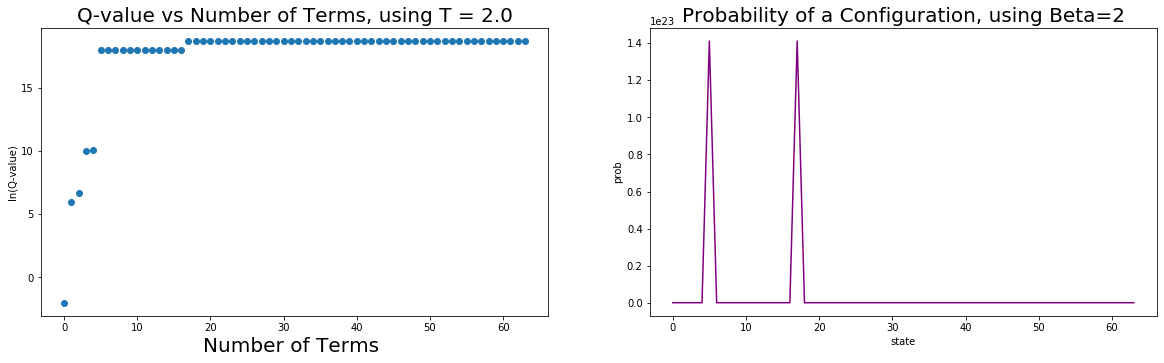

In [15]:
#Initializations
list_of_states = np.zeros(((2**(2*N)),N,N))
beta = 1.0/2  #temperature = 2 here

#for our first initial state, i_state, we need to store our configuration in a table
i_state = initial_state(N)
list_of_states[0]=i_state

#Make Monte Carlo Move
for i in range(mc_moves):  
    list_of_states, i_state = get_list_of_states(i_state, beta,list_of_states)
    for ii in range(len(list_of_states)):
        if np.all(i_state == list_of_states[ii]):
            break
        elif not np.all(0 == list_of_states[ii]):
            pass
        else:
            list_of_states[ii] = i_state
            break
            
    #Optional Convenience
    if i%10 == 0:
        clear_output(wait=True)
        print("Percent Complete =",round(i*100/mc_moves), "%")
    elif i == mc_moves-1:
        clear_output(wait=True)
        print("Percent Complete = 100%")
            
#Final Processing
print("Finished Processing list_of_states")
Q, Q_list = get_Q(list_of_states)
print("Q calculated")
P = calc_P(i_state,2,Q)
print("Probability Calculated = 100%")
print("\n\n Q =", Q, "system of size N=", N, "at equilibrium")

#Plot Q Result
f = plt.figure(figsize=(20, 18)) # plot the calculated values    
sp =  f.add_subplot(3, 2, 1 );
plt.scatter(terms, np.log(Q_list))
plt.title("Q-value vs Number of Terms, using T = 2.0", fontsize="20")
plt.xlabel("Number of Terms ", fontsize="20")
plt.ylabel("ln(Q-value)")
plt.axis('tight')

sp = f.add_subplot(3,2,2)
plt.plot(freq,P, color='purple')
plt.title('Probability of a Configuration, using Beta=2', fontsize="20")
plt.xlabel('state')
plt.ylabel('prob')

## Main Calculations

In [17]:
#Initializations
E,M = np.zeros(t_num), np.zeros(t_num) #this needs to be set to zero for each re-use of the program

for T_tick in range(t_num):
    H = m = 0
    i_state = initial_state(N)
    beta=1.0/T[T_tick]
    
    #This is where the magic happens
    for i in range(mc_moves):
        metro_move(i_state, beta)   # equilibriate state i_state
        H_i = calc_energy(i_state)   # calculate the energy at equilibrium of i_state
        m_i = calc_mag(i_state)      # calculate the magnetisation at equilibrium of i_state
        H += H_i
        m += m_i

    #Store Calculations
    E[T_tick] = H
    M[T_tick] = m/N
    
    #Optional Convenience
    if T_tick%10 == 0:
        clear_output(wait=True)
        print("Percent Complete =",round(T_tick*100/t_num), "%")
    elif T_tick == t_num-1:
        clear_output(wait=True)
        print("Percent Complete = 100%")

Percent Complete = 100%


## Calculate Magnetization at Equilibrium of i_state at system size (sys_n)

In [807]:
#Initializations
N_max = 8
M_by_size = np.zeros(N_max+1)

#Main Calculations
for sys_n in range(1,N_max+1):
    N = sys_n
    m = 0
    i_state = initial_state(sys_n)
    for i in range(mc_moves):
        metro_move(i_state, 3)
        m_i = calc_mag(i_state)      # calculate the magnetisation at equilibrium of i_state at system size (sys_n)
        m += m_i

    #Store Calculations
    M_by_size[sys_n] = m/sys_n

#Convenience
print("Magnetization calculated = 100%")

Magnetization calculated = 100%


## Plots

Text(0, 0.5, 'Magnetization')

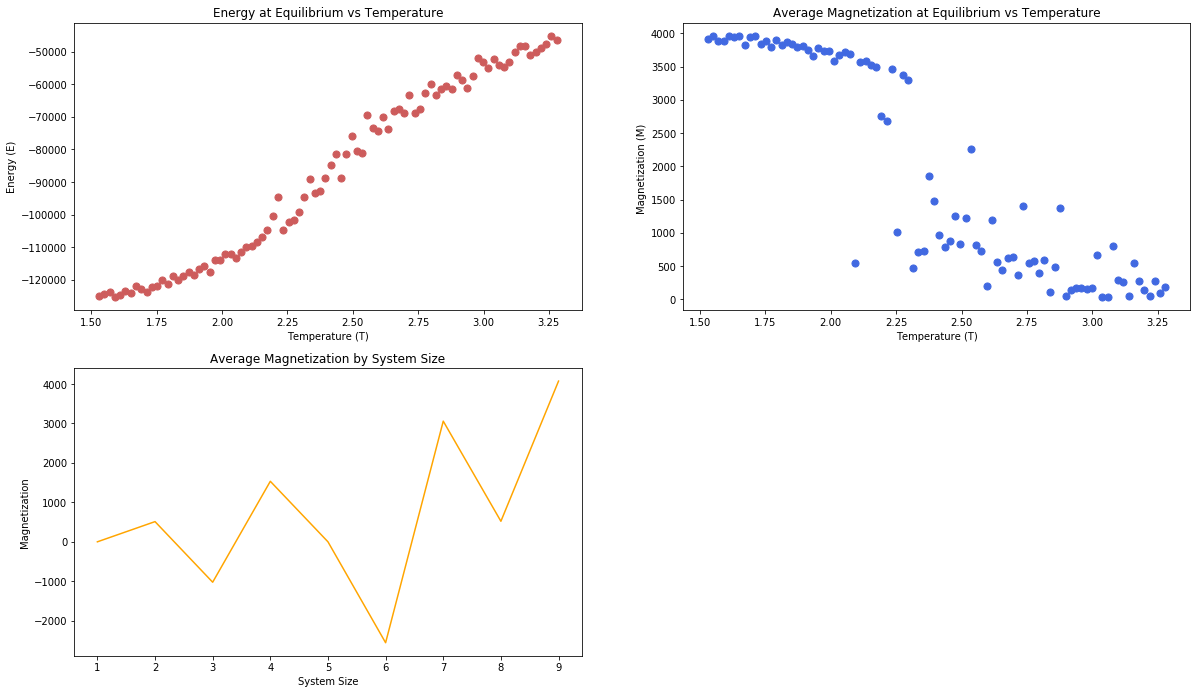

In [809]:
#Prep Figure
f = plt.figure(figsize=(20, 18)); # plot the calculated values    

#Prep subplot, plot desired result
sp =  f.add_subplot(3, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.title("Energy at Equilibrium vs Temperature")
plt.xlabel("Temperature (T)")
plt.ylabel("Energy (E)")
plt.axis('tight')

#Plot 2
sp =  f.add_subplot(3, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.title("Average Magnetization at Equilibrium vs Temperature")
plt.xlabel("Temperature (T)") 
plt.ylabel("Magnetization (M) ")
plt.axis('tight')

#etc

sp = f.add_subplot(3,2,3)
sys_x = np.arange(1,N_max+2,1)
plt.plot(sys_x, M_by_size, color='orange')
plt.title('Average Magnetization by System Size')
plt.xlabel('System Size')
plt.ylabel('Magnetization')

# Main Program 2, For Parameters J = -1, h = 0
## Plots:
 - Energy at equilibrium vs Temperature
 - Avg. Magnetization at equilibrium vs Temperature
 - Probability vs State of System 
 - Avg. Magnetization at equilibrium vs System Size
<br><br>Note: Systems that are independent of temperature have T set equal to 2.0

## Define Parameters

In [818]:
t_num    = 88                     #  temperature points
N        = 8                      #  lattice side length (NxN),  system seems to graph better with higher dimensions
bolz     = 1.38064852*(10^-23)    # bolzmann's constant
J        = -1                     # 1 or -1 for approx
mu_B     = 9.274*(10^-24)         # Bohr magneton constant with units [J/T]
m_field  = 0                      # external magnetic field
mc_moves = 512                   #  number of random walks to reach equilibrium
T        = np.linspace(1.53, 3.28, t_num)
freq     = np.arange(0, 2**(2*N),1) 
terms = np.arange(0,len(list_of_states),1)

## Main Section

In [819]:
#Initializations (setting anything to zero should be handled with every execution)
E,M = np.zeros(t_num), np.zeros(t_num) #this needs to be set to zero for each re-use of the program

#Main Section
for T_tick in range(t_num):
    H = m = 0
    i_state = initial_state(N)
    beta=1.0/T[T_tick]
    
    #This is where the magic happens
    for i in range(mc_moves):
        metro_move(i_state, beta)   # equilibriate state i_state
        H_i = calc_energy(i_state)   # calculate the energy at equilibrium of i_state
        m_i = calc_mag(i_state)      # calculate the magnetisation at equilibrium of i_state
        H += H_i
        m += m_i

    #Store Calculations
    E[T_tick] = H
    M[T_tick] = m/N
    
    #Optional Convenience
    if T_tick%10 == 0:
        clear_output(wait=True)
        print("Percent Complete =",round(T_tick*100/t_num), "%")
    elif T_tick == t_num-1:
        clear_output(wait=True)
        print("Percent Complete = 100%")

Percent Complete = 100%


## Calculate Number of States, Partition function Q, and Probability P

P-Percent Complete = 100%
Probability Calculated = 100%


 Q = 17084.807398424262 system of size N= 3 at equilibrium


Text(0, 0.5, 'prob')

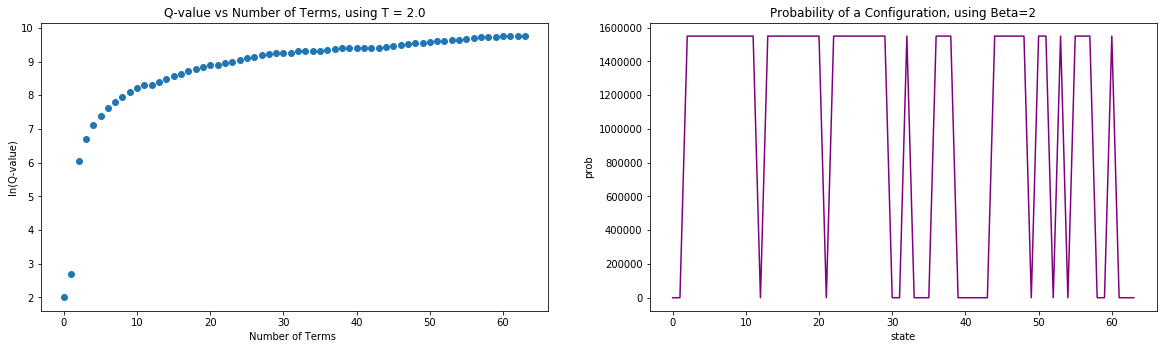

In [817]:
#Initializations
list_of_states = np.zeros(((2**(2*N)),N,N))
beta = 1.0/2 #Temperature = 2 here

#for our first initial state, i_state, we need to store our configuration in a table
i_state = initial_state(N)
list_of_states[0]=i_state

#Main Section
for i in range(mc_moves):  
    list_of_states, i_state = get_list_of_states(i_state, beta,list_of_states)
    for ii in range(len(list_of_states)):
        if np.all(i_state == list_of_states[ii]):
            break
        elif not np.all(0 == list_of_states[ii]):
            pass
        else:
            list_of_states[ii] = i_state
            break
            
    #Optional Convenience
    if i%10 == 0:
        clear_output(wait=True)
        print("Percent Complete =",round(i*100/mc_moves), "%")
    elif i == mc_moves-1:
        clear_output(wait=True)
        print("Percent Complete = 100%")
            
#Final Processing
print("Finished Processing list_of_states")
Q, Q_list = get_Q(list_of_states)
print("Q calculated")
P = calc_P(i_state,2,Q)
print("Probability Calculated = 100%")
print("\n\n Q =", Q, "system of size N=", N, "at equilibrium")
      
#Plot Q Result
f = plt.figure(figsize=(20, 18)) # plot the calculated values    
sp =  f.add_subplot(3, 2, 1 );
plt.scatter(terms, np.log(Q_list))
plt.title("Q-value vs Number of Terms, using T = 2.0")
plt.xlabel("Number of Terms ")
plt.ylabel("ln(Q-value)")
plt.axis('tight')

sp = f.add_subplot(3,2,2)
plt.plot(freq,P, color='purple')
plt.title('Probability of a Configuration, using Beta=2')
plt.xlabel('state')
plt.ylabel('prob')

## Calculate Magnetization at Equilibrium of i_state at system size (sys_n)

In [820]:
#Initializations
N_max = 8
M_by_size = np.zeros(N_max+1)

#Main Section
for sys_n in range(1,N_max+1):
    N = sys_n
    m = 0
    i_state = initial_state(sys_n)
    
    for i in range(mc_moves):
        metro_move(i_state, 3)
        m_i = calc_mag(i_state)      # calculate the magnetisation at equilibrium of i_state at system size (sys_n)
        m += m_i

    #Store Calculations
    M_by_size[sys_n] = m/sys_n

#Convenience
print("Magnetization calculated = 100%")

Magnetization calculated = 100%


## Plots

Text(0, 0.5, 'Magnetization')

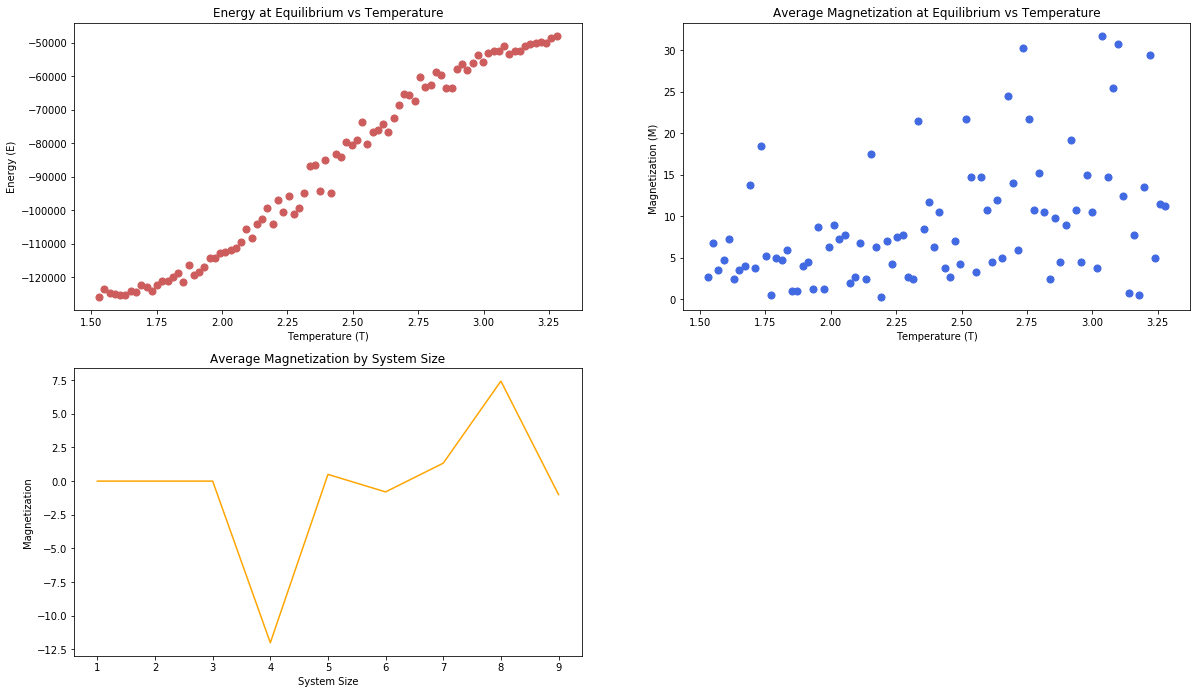

In [821]:
#Prep and plot results again
f = plt.figure(figsize=(20, 18)); # plot the calculated values    

sp =  f.add_subplot(3, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.title("Energy at Equilibrium vs Temperature")
plt.xlabel("Temperature (T)")
plt.ylabel("Energy (E)")
plt.axis('tight')

sp =  f.add_subplot(3, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.title("Average Magnetization at Equilibrium vs Temperature")
plt.xlabel("Temperature (T)") 
plt.ylabel("Magnetization (M) ")
plt.axis('tight')

sp = f.add_subplot(3,2,3)
sys_x = np.arange(1,N_max+2,1)
plt.plot(sys_x, M_by_size, color='orange')
plt.title('Average Magnetization by System Size')
plt.xlabel('System Size')
plt.ylabel('Magnetization')

# Main Program 3, For Parameters J = 1, h = 1
## Plots:
 - Energy at equilibrium vs Temperature
 - Avg. Magnetization at equilibrium vs Temperature
 - Probability vs State of System 
 - Avg. Magnetization at equilibrium vs System Size
<br><br>Note: Systems that are independent of temperature have T set equal to 2.0

## Define Parameters

In [826]:
t_num    = 88                     #  temperature points
N        = 8                      #  lattice side length (NxN),  system seems to graph better with higher dimensions
bolz     = 1.38064852*(10^-23)    # bolzmann's constant
J        = 1                      # 1 or -1 for approx
mu_B     = 9.274*(10^-24)         # Bohr magneton constant with units [J/T]
m_field  = 1                      # external magnetic field
mc_moves = 1024                   #  number of random walks to reach equilibrium
T        = np.linspace(1.53, 3.28, t_num)
freq     = np.arange(0, 2**(2*N),1) 
terms = np.arange(0,len(list_of_states),1)

## Main Section

In [827]:
#Initializations
E,M = np.zeros(t_num), np.zeros(t_num) #this needs to be set to zero for each re-use of the program

#Main Section
for T_tick in range(t_num):
    H = m = 0
    i_state = initial_state(N)
    beta=1.0/T[T_tick]
    
    #This is where the magic happens
    for i in range(mc_moves):
        metro_move(i_state, beta)   # equilibriate state i_state
        H_i = calc_energy(i_state)   # calculate the energy at equilibrium of i_state
        m_i = calc_mag(i_state)      # calculate the magnetisation at equilibrium of i_state
        H += H_i
        m += m_i

    #Store Calculations
    E[T_tick] = H
    M[T_tick] = m/N
    
    #Optional Convenience
    if T_tick%10 == 0:
        clear_output(wait=True)
        print("Percent Complete =",round(T_tick*100/t_num), "%")
    elif T_tick == t_num-1:
        clear_output(wait=True)
        print("Percent Complete = 100%")

Percent Complete = 100%


## Calculate Number of States, Partition function Q, and Probability P

P-Percent Complete = 100%
Probability Calculated = 100%


 Q = inf system of size N= 3 at equilibrium


Text(0, 0.5, 'prob')

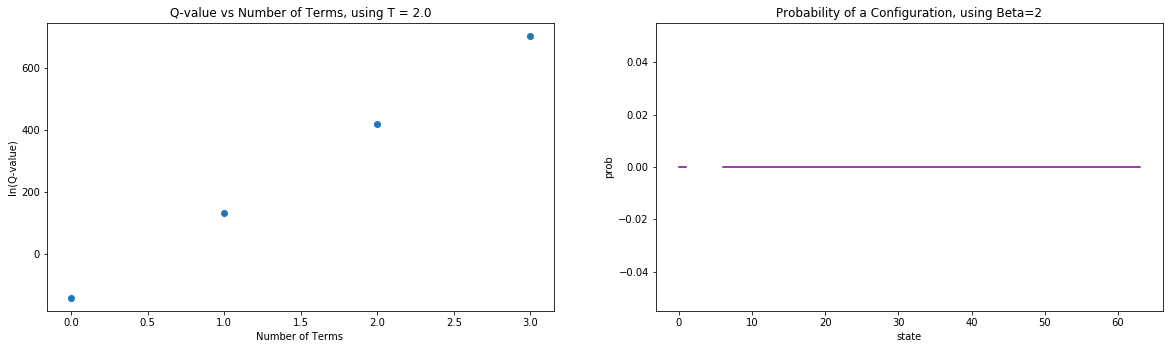

In [825]:
#Initializations
list_of_states = np.zeros(((2**(2*N)),N,N))
beta = 1.0/2 #temperature = 2 here

#for our first initial state, i_state, we need to store our configuration in a table
i_state = initial_state(N)
list_of_states[0]=i_state

#Main Section
for i in range(mc_moves):
    
    list_of_states, i_state = get_list_of_states(i_state, beta,list_of_states)
    
    for ii in range(len(list_of_states)):
        if np.all(i_state == list_of_states[ii]):
            break
        elif not np.all(0 == list_of_states[ii]):
            pass
        else:
            list_of_states[ii] = i_state
            break
            
    #Optional Convenience
    if i%10 == 0:
        clear_output(wait=True)
        print("Percent Complete =",round(i*100/mc_moves), "%")
    elif i == mc_moves-1:
        clear_output(wait=True)
        print("Percent Complete = 100%")
        
#Final Processing
print("Finished Processing list_of_states")
Q, Q_list = get_Q(list_of_states)
print("Q calculated")
P = calc_P(i_state,2,Q)
print("Probability Calculated = 100%")
print("\n\n Q =", Q, "system of size N=", N, "at equilibrium")
      
#Plot the results
f = plt.figure(figsize=(20, 18)) # plot the calculated values    
sp =  f.add_subplot(3, 2, 1 );
plt.scatter(terms, np.log(Q_list))
plt.title("Q-value vs Number of Terms, using T = 2.0")
plt.xlabel("Number of Terms ")
plt.ylabel("ln(Q-value)")
plt.axis('tight')

sp = f.add_subplot(3,2,2)
plt.plot(freq,P, color='purple')
plt.title('Probability of a Configuration, using Beta=2')
plt.xlabel('state')
plt.ylabel('prob')

## Calculate Magnetization at Equilibrium of i_state at system size (sys_n)

In [828]:
#Initializations
N_max = 8
M_by_size = np.zeros(N_max+1)

#Main Section
for sys_n in range(1,N_max+1):
    N = sys_n
    m = 0
    i_state = initial_state(sys_n)
    
    for i in range(mc_moves):
        metro_move(i_state, 3)
        m_i = calc_mag(i_state)      # calculate the magnetisation at equilibrium of i_state at system size (sys_n)
        m += m_i

    #Store Calculations
    M_by_size[sys_n] = m/sys_n
    
#Convenience
print("Magnetization calculated = 100%")

Magnetization calculated = 100%


## Plots

Text(0, 0.5, 'Magnetization')

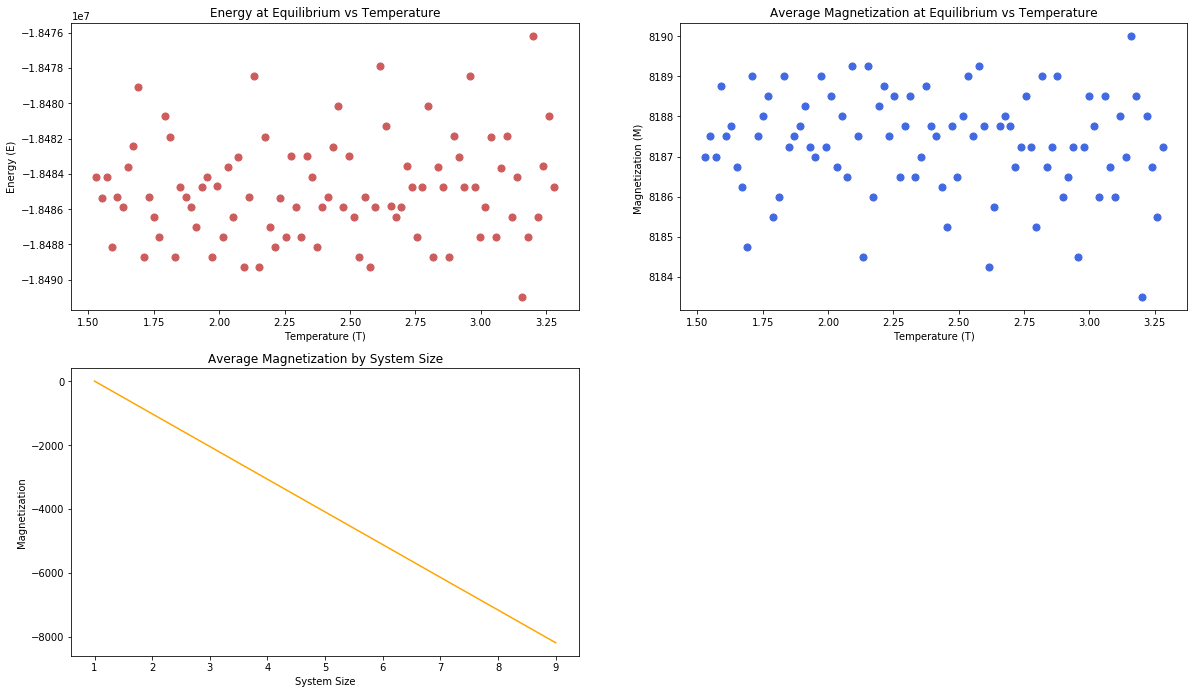

In [830]:
#More results
f = plt.figure(figsize=(20, 18)); # plot the calculated values    

sp =  f.add_subplot(3, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.title("Energy at Equilibrium vs Temperature")
plt.xlabel("Temperature (T)")
plt.ylabel("Energy (E)")
plt.axis('tight')

sp =  f.add_subplot(3, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.title("Average Magnetization at Equilibrium vs Temperature")
plt.xlabel("Temperature (T)") 
plt.ylabel("Magnetization (M) ")
plt.axis('tight')

sp = f.add_subplot(3,2,3)
sys_x = np.arange(1,N_max+2,1)
plt.plot(sys_x, M_by_size, color='orange')
plt.title('Average Magnetization by System Size')
plt.xlabel('System Size')
plt.ylabel('Magnetization')

# Plot of system at Different Time Steps

In [769]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

class model():    
    
    #DEFINE METHODS
    def metro_move(self, i_state, N, beta):
        
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N)
                    b = np.random.randint(0, N)
                    s_i =  i_state[a, b]
                    s_j = i_state[(a+1)%N,b] + i_state[a,(b+1)%N] + i_state[(a-1)%N,b] + i_state[a,(b-1)%N]
                    dE = 2*s_i*s_j
                    if dE < 0:	
                        s_i *= -1
                    elif rand() < np.exp(-beta*dE):
                        s_i *= -1
                    i_state[a, b] = s_i
                    
        return i_state
    
    def run_simulation(self):
        # Initialise parameters - lattice side length and temperature
        N, T     = 64, .4        
        i_state = 2*np.random.randint(2, size=(N,N))-1
        
        #Initial Figure
        f = plt.figure(figsize=(15, 15), dpi=80);    
        self.setup_plot(f, i_state, 0, N, 1);
        
        #Time Step Calculations
        time_max = 1001
        for i in range(time_max):
            self.metro_move(i_state, N, 1.0/T)
            
            if i == 1:       self.setup_plot(f, i_state, i, N, 2)
            if i == 5:       self.setup_plot(f, i_state, i, N, 3)
            if i == 33:      self.setup_plot(f, i_state, i, N, 4)
            if i == 100:     self.setup_plot(f, i_state, i, N, 5)
            if i == 1000:    self.setup_plot(f, i_state, i, N, 6)
            
            #Optional Convenience
            if i%10 == 0:
                clear_output(wait=True)
                print("Percent Complete =",round(i*100/time_max), "%")
            elif i == time_max-1:
                clear_output(wait=True)
                print("Percent Complete = 100%")
                
        #Important information
        print("For J = ", J, " m_field = ", m_field)

    #Plotting Method
    def setup_plot(self, f, i_state, i, N, n_):
        #Simplify Plotting procedure
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 2, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, i_state, cmap=plt.cm.bwr)
        plt.title('Time=%d'%i)
        plt.axis('tight')    
    plt.show()

In [770]:
rm = model()  # prepare class object

Percent Complete = 100 %
For J =  1  m_field =  1


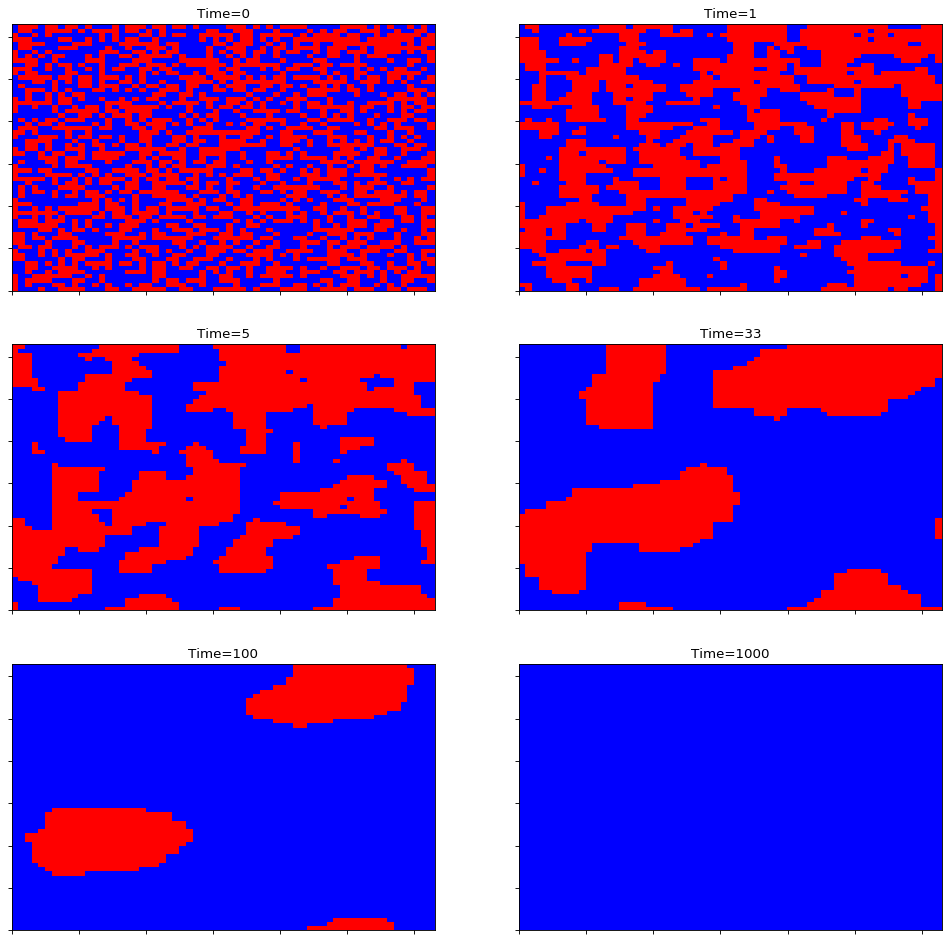

In [771]:
rm.run_simulation() # call class method

# Magnetization Vs Time

Percent Complete = 100 %
For J = 1  and m_field = 0 system size =  64


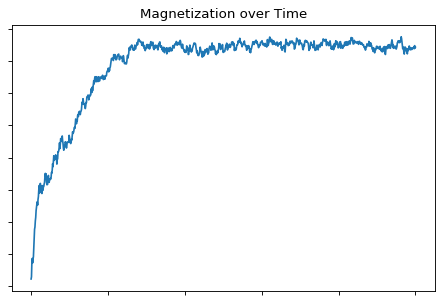

In [774]:
# Initialise parameters - lattice side length and temperature
N, T, m_field     = 64, .4, 0
i_state = 2*np.random.randint(2, size=(N,N))-1

#Initial Figure
f = plt.figure(figsize=(15, 15), dpi=80);    
    
#Time Step Calculations
time_max = 1001
M = np.zeros(time_max)
time_steps = np.arange(0,time_max,1)

#Main Section
for ii in range(time_max):
    for i in range(N):
        for j in range(N):
                #choose a random spin
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                #that spin, sigma_i is s_i
                s_i =  i_state[a, b]
                #the sum of the nearest neighbors to s_i is s_j
                s_j = i_state[(a+1)%N,b] + i_state[a,(b+1)%N] + i_state[(a-1)%N,b] + i_state[a,(b-1)%N]
                e_i = -J*s_i*s_j-(mu_B*m_field*s_i)
                dE = -2*e_i
                if dE < 0:
                    s_i *= -1
                elif rand() < np.exp(-beta*dE):
                    s_i *= -1
                i_state[a, b] = s_i
                
    #Store Calculations 
    M[ii] = np.sum(i_state)
    
    #Optional Convenience
    if ii%10 == 0:
        clear_output(wait=True)
        print("Percent Complete =",round(ii*100/time_max), "%")
    elif ii == time_max-1:
        clear_output(wait=True)
        print("Percent Complete = 100%")

#Important information
print("For J =", J, " and m_field =", m_field, "system size = ", N)

#Plot results
sp =  f.add_subplot(3, 2, 1)  
plt.setp(sp.get_yticklabels(), visible=False)
plt.setp(sp.get_xticklabels(), visible=False)      
plt.plot(time_steps,M)
plt.title('Magnetization over Time')
plt.axis('tight')    
plt.show()